<a href="https://colab.research.google.com/github/Vengadore/Notebooks/blob/master/Data_analysis_PDR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download dataset
from IPython.display import clear_output
!wget "https://correoipn-my.sharepoint.com/:u:/g/personal/ccarrillog1400_alumno_ipn_mx/Efj-qLSMa2tPm6O9MUp6X0QBN5SDwHvMFh4Ni3dynVOzxg?download=1"
!sudo chmod 777 "Efj-qLSMa2tPm6O9MUp6X0QBN5SDwHvMFh4Ni3dynVOzxg?download=1"
!mv "Efj-qLSMa2tPm6O9MUp6X0QBN5SDwHvMFh4Ni3dynVOzxg?download=1" "PDR.rar"
!unrar x PDR.rar
!rm PDR.rar
clear_output(wait=False)

print("Data downloaded")

Data downloaded


In [2]:
!git clone --depth 1 https://github.com/Vengadore/Segmentation_OPTOS.git

Cloning into 'Segmentation_OPTOS'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11 (delta 0), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


In [3]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
path = "./"
Data1 = pd.read_csv(os.path.join(path,'gTruthP1.csv'))
Data2 = pd.read_csv(os.path.join(path,'gTruthP2.csv'))

In [5]:
## Add full path for Data1
Data1['imageFilename'] = Data1['imageFilename'].apply(lambda x: os.path.join(os.path.join(path,"Parte 1 (PDR)"),x))
Data1.head()

,imageFilename,Label,x,y,x_width,y_width
0,./Parte 1 (PDR)/16_left.jpeg,NV,2196,1132,583,1092
1,./Parte 1 (PDR)/16_left.jpeg,AR,2815,1257,104,71
2,./Parte 1 (PDR)/16_left.jpeg,AR,3305,875,83,54
3,./Parte 1 (PDR)/16_left.jpeg,AR,2115,2455,46,40
4,./Parte 1 (PDR)/16_left.jpeg,AR,2133,2511,59,60


In [6]:
## Add full path for Data2
Data2['imageFilename'] = Data2['imageFilename'].apply(lambda x: os.path.join(os.path.join(path,"Parte 2 (PDR)"),x))
Data2.head()

,imageFilename,Label,x,y,x_width,y_width
0,./Parte 2 (PDR)/22665_right.jpeg,AR,1305,1649,107,94
1,./Parte 2 (PDR)/22669_left.jpeg,NV,494,712,400,527
2,./Parte 2 (PDR)/22669_right.jpeg,AR,1994,1469,65,70
3,./Parte 2 (PDR)/22669_right.jpeg,AR,1219,1306,71,53
4,./Parte 2 (PDR)/22669_right.jpeg,AR,829,564,35,25


In [7]:
Data = Data1.append(Data2).reset_index()
Data = Data[['imageFilename','Label','x','y','x_width','y_width']]

(-0.5, 2815.5, 1879.5, -0.5)

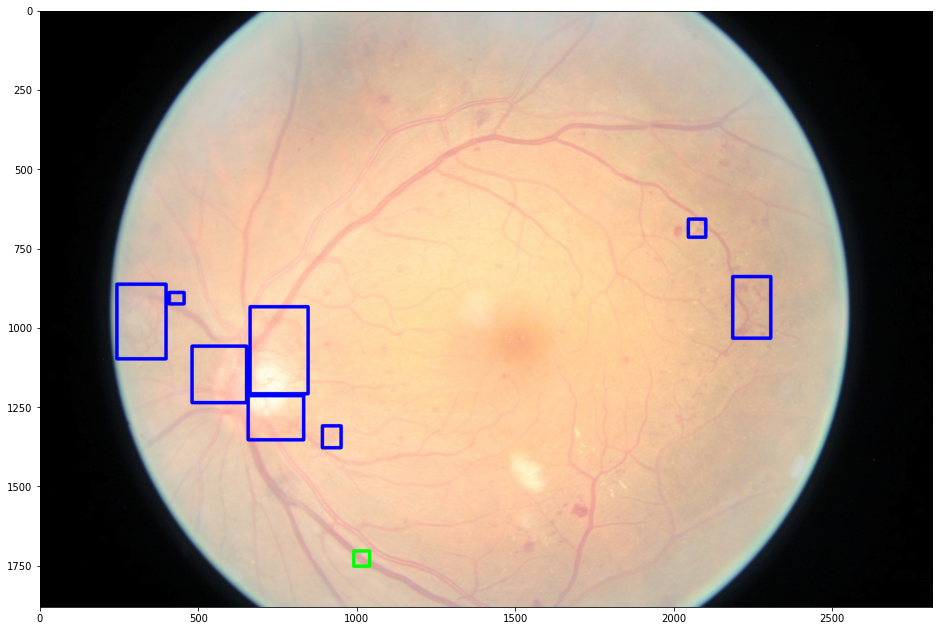

In [8]:
i = 14
I = cv2.imread(Data.iloc[i].imageFilename)
I = cv2.cvtColor(I,4)
#I = cv2.cvtColor(I, cv2.COLOR_BGR2YUV)
#I[:,:,0] = cv2.equalizeHist(I[:,:,0])
#I = cv2.cvtColor(I, cv2.COLOR_YUV2RGB)
I = np.array(I)

File_name = Data.iloc[i].imageFilename;
while(Data.iloc[i].imageFilename == File_name):
    if Data.iloc[i].Label == "AR":
        color = (0,255,0)
    else:
        color = (0,0,255)
    I = cv2.rectangle(I,
                     (Data.iloc[i].x,Data.iloc[i].y),
                     (Data.iloc[i].x + Data.iloc[i].x_width, Data.iloc[i].y + Data.iloc[i].y_width),color, 10)
    i += 1
plt.figure(figsize = (16,16))
plt.imshow(I)
plt.axis('on')

In [9]:
Data.groupby(['Label']).count()

,imageFilename,x,y,x_width,y_width
Label,,,,,
AR,411,411,411,411,411
NV,470,470,470,470,470


## Area of bounding boxes

In [10]:
Data['Area'] = Data['x_width']*Data['y_width']

### Neovessels analysis

STD =  370625.29919405456


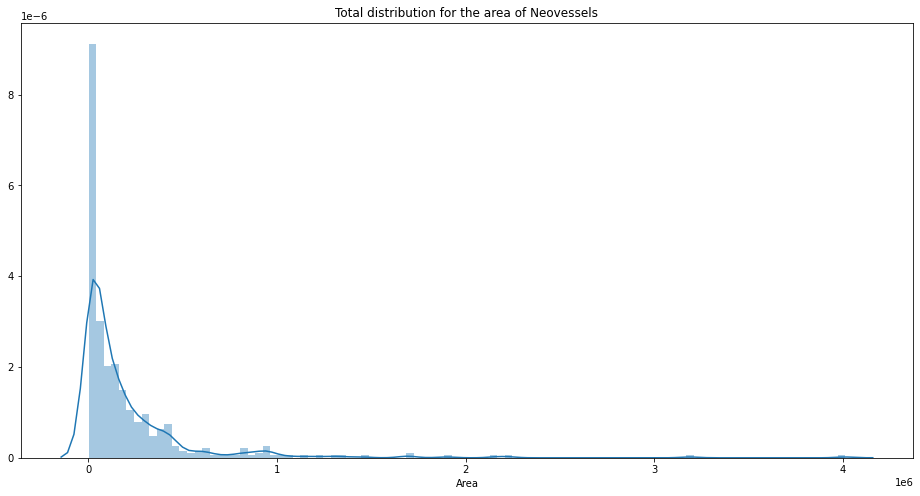

In [11]:
plt.figure(figsize=(16,8))
sns.distplot(Data[Data['Label'] == "NV"]["Area"],bins = 100)
plt.title("Total distribution for the area of Neovessels")
print("STD = ",np.std(Data[Data['Label'] == "NV"]["Area"].values))

Given the different areas we can just keep the useful areas where the area is below $0.05 \times 1e7 $

STD =  120311.61899665411


,imageFilename,x,y,x_width,y_width,Area
Label,,,,,,
NV,304,304,304,304,304,304


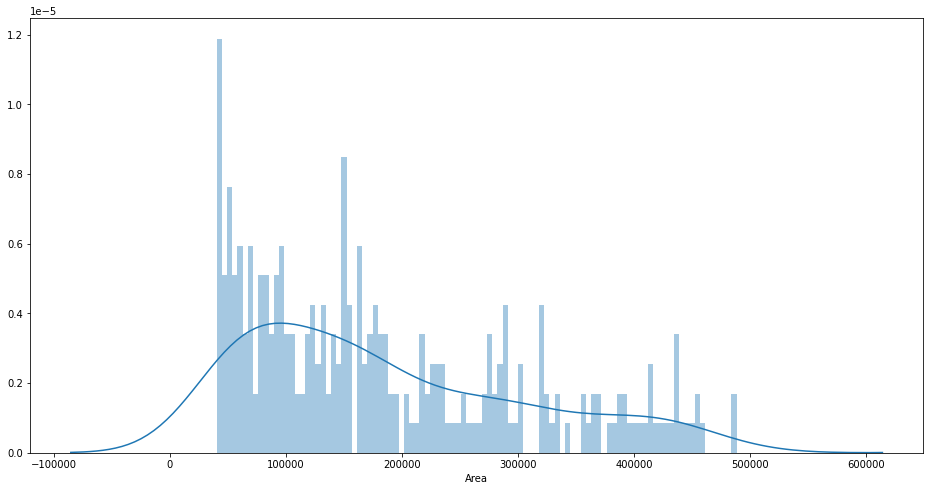

In [12]:
## Areas to keep
Data_NV = Data[Data['Label'] == "NV"].copy()
#Data_NV = Data_NV[Data_NV['Area'] < 0.05*1e7]
Data_NV = Data_NV[Data_NV['Area'] > 40000] ## Added to get rid of the smallest data
plt.figure(figsize=(16,8))
sns.distplot(Data_NV[Data_NV['Area'] < 0.05*1e7]["Area"],bins = 100)
print("STD = ",np.std(Data_NV[Data_NV['Area'] < 0.05*1e7]["Area"].values))
Data_NV.groupby(['Label']).count()

By doing this the number of images decreased from 471 to 429 with a much lower $\sigma$.
It is worth to analyze the witdh and height of the patches from the image by computing the mean of both measurements and thus defining the shape of the network to use

In [13]:
print("x_width Mean = ",np.mean(Data_NV['x_width'].values))
print("x_width Mean = ",np.mean(Data_NV['y_width'].values))

x_width Mean =  494.04276315789474
x_width Mean =  502.1578947368421


Given this analysis we can propose a network of an input shape of (312,312,3)

### Arrosariamiento analysis

STD =  20081.890329476148


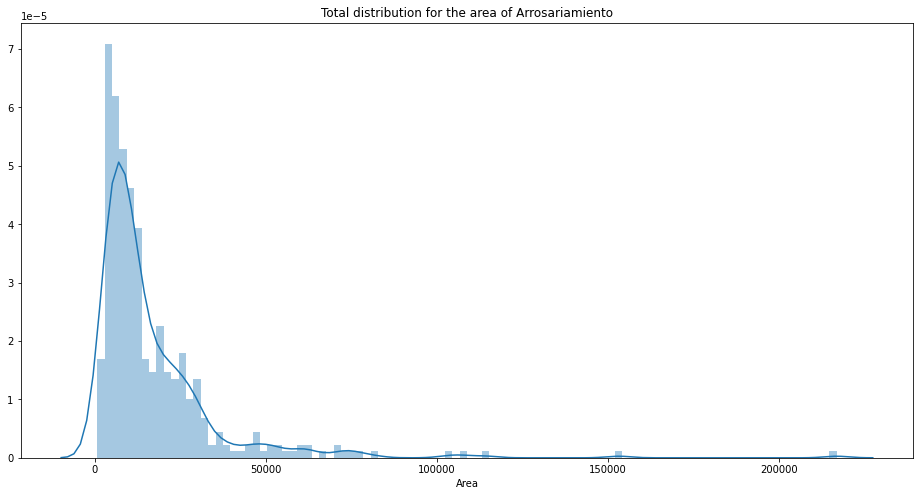

In [14]:
plt.figure(figsize=(16,8))
sns.distplot(Data[Data['Label'] == "AR"]["Area"],bins = 100)
plt.title("Total distribution for the area of Arrosariamiento")
print("STD = ",np.std(Data[Data['Label'] == "AR"]["Area"].values))

Given the different areas we can just keep the useful areas where the area is below $100 000$

STD =  14133.934987419996


,imageFilename,x,y,x_width,y_width,Area
Label,,,,,,
AR,406,406,406,406,406,406


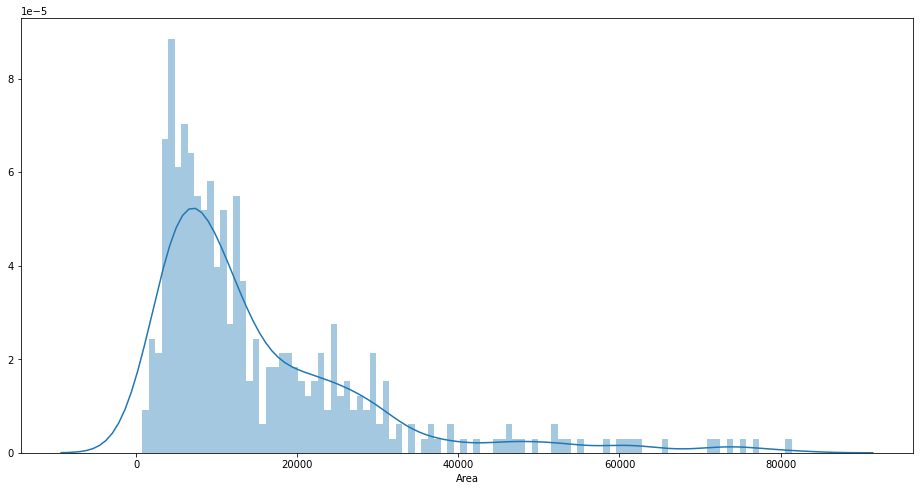

In [15]:
## Areas to keep
Data_AR = Data[Data['Label'] == "AR"].copy()
Data_AR = Data_AR[Data_AR['Area'] < 100000]
plt.figure(figsize=(16,8))
sns.distplot(Data_AR["Area"],bins = 100)
print("STD = ",np.std(Data_AR["Area"].values))
Data_AR.groupby(['Label']).count()

By doing this the number of images decreased from 413 to 406 with a much lower $\sigma$ 
It is worth to analyze the witdh and height of the patches from the image by computing the mean of both measurements and thus defining the shape of the network to use

In [16]:
print("x_width Mean = ",np.mean(Data_AR['x_width'].values))
print("x_width Mean = ",np.mean(Data_AR['y_width'].values))

x_width Mean =  126.27832512315271
x_width Mean =  111.12068965517241


Given this analysis we can propose a network of an input shape of (128,128,3)

# NEOVESSELS VISUALIZATION

In [17]:
Data_NV = Data_NV.reset_index().drop(["index"],axis=1)

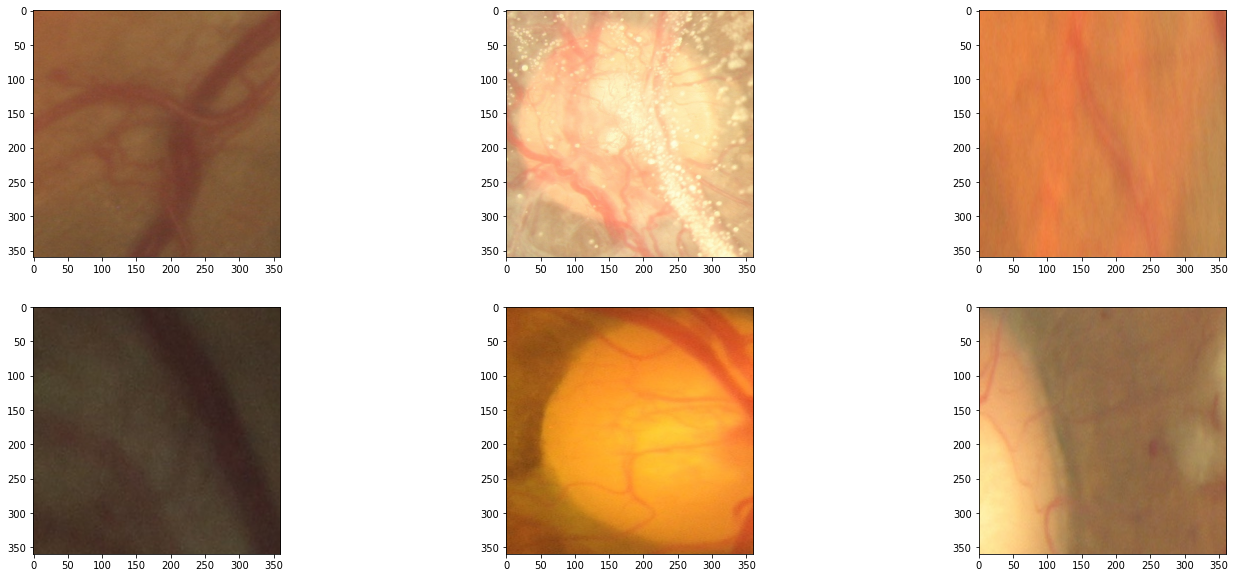

In [18]:
nr,ncol = (2,3)
fig,axs = plt.subplots(nr,ncol,figsize = (ncol*8,nr*5))
indx_rand = np.random.randint(0,len(Data_NV),nr*ncol)
k = 0
for i in range(1,nr+1):
    for j in range(1,ncol+1):
        ## Read the image
        I = cv2.imread(Data_NV.iloc[indx_rand[k]]['imageFilename'])
        # Coordinates for the patch
        x = int(Data_NV.iloc[indx_rand[k]]['x'])
        y = int(Data_NV.iloc[indx_rand[k]]['y'])
        x_width = int(Data_NV.iloc[indx_rand[k]]['x_width'])
        y_width = int(Data_NV.iloc[indx_rand[k]]['y_width'])
        #I = cv2.cvtColor(I, cv2.COLOR_BGR2YUV)
        #I[:,:,0] = cv2.equalizeHist(I[:,:,0])
        #I = cv2.cvtColor(I, cv2.COLOR_YUV2RGB)
        I = cv2.cvtColor(I, 4)
        #I = I[:,:,1]
        ## Extract patch
        I = I[y:y+y_width,x:x+x_width]
        #print(I.shape)
        I = cv2.resize(I,(360,360),interpolation = cv2.INTER_LANCZOS4)
        axs[i-1][j-1].imshow(I)
        k += 1

By this point we identified the regions in our dataset with the presence of neovessels, we will try to create a binary classification

**Classes**:
 * NEOVESSELS
 * HEALTHY

### Data into memory
For the data we will create a ground truth of the image (Black and white). Extract all the neovessels from that image as a patch, then extract the patch and resize it to the target size. Use the ground truth to find a box that has no neovessels.

In [19]:
from Segmentation_OPTOS.Tools.Generators.Binary_generator import bb_intersection_over_union
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import random

In [20]:
last_name = ""

## Target size
target_size = (331,331)

## Empty arrays
X_train = []
y_train = []

np.random.seed(42)

for (i,row) in Data_NV.iterrows():
  ## Read image
  I = cv2.cvtColor(cv2.imread(row['imageFilename']),4)
  
  ## Original shape
  M,N,C = I.shape

  ## Limits
  x = row['y']
  y = row['x']
  x_width = row['y_width']
  y_width = row['x_width']

  ## Create random values  
  x_fake = np.random.randint(0,M-x_width-2,1)[0]
  y_fake = np.random.randint(0,N-y_width-2,1)[0]
  
  BoxGT = [x,y,x+x_width,y+y_width]
  BoxN  = [x_fake,y_fake,x_fake+x_width,y_fake+y_width]

  while bb_intersection_over_union(BoxGT,BoxN) >= 0.1:
    ## Get the points of the negative patch
    x_fake = int(np.random.randint(0, M-x_width-2, 1))
    y_fake = int(np.random.randint(0, N-y_width-2, 1))
    BoxN = [x_fake, y_fake, x_fake + x_width, y_fake + y_width]

  ## Add image to batch
  X_train.append(cv2.resize(I[x:x+x_width,y:y+y_width,:],target_size))
  ## Add negative image to batch
  X_train.append(cv2.resize(I[x_fake:x_fake+x_width,y_fake:y_fake+y_width,:],target_size))
  
  ## Add output class
  y_train.append([1.])
  y_train.append([0.])

X_train = np.array(X_train)
y_train = np.array(y_train)

In [21]:
test_percentage = 0.2
order = [x for x in range(X_train.shape[0])]
order = random.sample(order, X_train.shape[0])
train_idx = order[:int(X_train.shape[0]*(1-test_percentage))]
test_idx = order[int(X_train.shape[0]*(1-test_percentage)+1):]

In [22]:
train_datagen = ImageDataGenerator(rotation_range=20,width_shift_range=0.2,
                                   height_shift_range=0.2,
                             horizontal_flip=True,
                             vertical_flip = True,
                             rescale = 1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Network definition

In [23]:
from tensorflow.keras.applications import EfficientNetB7
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.models import Sequential

In [24]:
base = EfficientNetB7(include_top= False,
                   weights = 'imagenet',
                   input_shape = (331,331,3),
                   classes=2)

258080768/258076736 [==============================] - 2s 0us/step


In [25]:
model = Sequential()
model.add(base)
model.add(Flatten())
#model.add(Dense(,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb7 (Functional)  (None, 11, 11, 2560)      64097687  
_________________________________________________________________
flatten (Flatten)            (None, 309760)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 309761    
Total params: 64,407,448
Trainable params: 64,096,721
Non-trainable params: 310,727
_________________________________________________________________


In [27]:
from tensorflow.keras.optimizers import Adam

In [28]:
model.compile(optimizer  = Adam(0.0001),loss = 'binary_crossentropy',metrics = ['accuracy'])

In [29]:
history = model.fit(train_datagen.flow(x = X_train[train_idx], y = y_train[train_idx],batch_size=4),
                    epochs = 150,
                    steps_per_epoch = len(train_idx)//4,
                    validation_data = test_datagen.flow(x = X_train[test_idx], y = y_train[test_idx],batch_size=4),
                    validation_steps = len(test_idx)//4)

Epoch 1/150
121/121 [==============================] - 79s 655ms/step - loss: 1.1397 - accuracy: 0.6390 - val_loss: 2.1211 - val_accuracy: 0.4583
Epoch 2/150
121/121 [==============================] - 76s 627ms/step - loss: 1.0177 - accuracy: 0.6680 - val_loss: 2.5226 - val_accuracy: 0.4500
Epoch 3/150
121/121 [==============================] - 78s 644ms/step - loss: 0.6648 - accuracy: 0.7344 - val_loss: 2.4988 - val_accuracy: 0.4500
Epoch 4/150
121/121 [==============================] - 78s 646ms/step - loss: 0.6713 - accuracy: 0.7261 - val_loss: 1.2628 - val_accuracy: 0.6500
Epoch 5/150
121/121 [==============================] - 78s 646ms/step - loss: 0.6147 - accuracy: 0.7490 - val_loss: 0.7307 - val_accuracy: 0.7417
Epoch 6/150
121/121 [==============================] - 78s 646ms/step - loss: 0.6734 - accuracy: 0.7448 - val_loss: 1.2826 - val_accuracy: 0.7083
Epoch 7/150
121/121 [==============================] - 78s 647ms/step - loss: 0.7950 - accuracy: 0.7241 - val_loss: 1.1168 -